In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('D:/Github/PhD Code/Synthetic Data/monte_carlo/lut_rgb_bloodoxy_stepsize_1.csv')

In [5]:
df.head()


,melanin_concentration(Cm),blood_concentration(Ch),melanin_blend(Bm),BloodOxy,epidermis_thickness(T),X,Y,Z,sR,sG,sB
0,0.001,0.269428,0.0000,0.915,0.01,2.93434,2.31184,1.99307,254.057,145.159,154.999
1,0.001,0.269428,0.0000,0.950,0.01,2.88292,2.28462,2.04340,250.345,145.198,157.366
2,0.001,0.269428,0.2500,0.950,0.01,2.97536,2.32284,2.14879,254.997,144.578,161.864
3,0.001,0.269428,0.5625,0.950,0.01,2.96146,2.31573,2.15131,254.130,144.589,162.000
4,0.001,0.269428,1.0000,0.915,0.01,2.97514,2.35968,2.03411,254.994,147.521,156.524


In [6]:
df.describe()

,melanin_concentration(Cm),blood_concentration(Ch),melanin_blend(Bm),BloodOxy,epidermis_thickness(T),X,Y,Z,sR,sG,sB
count,333171.000000,333171.000000,333171.000000,333171.000000,333171.000000,333171.000000,333171.000000,333171.000000,333171.000000,333171.00000,333171.000000
mean,0.408372,0.345077,0.399441,0.777083,0.139901,1.251532,1.048392,0.680978,156.813927,94.33694,77.360727
std,0.291665,0.304633,0.374802,0.110599,0.086384,0.842538,0.733242,0.646812,56.311825,37.07822,38.320208
min,0.001000,0.001000,0.000000,0.600000,0.010000,0.131534,0.124646,0.090280,44.860000,33.47000,22.404000
25%,0.150569,0.065916,0.062500,0.670000,0.090000,0.524962,0.447562,0.243571,107.765000,63.65000,47.330500
50%,0.360944,0.269428,0.250000,0.775000,0.170000,1.053350,0.851108,0.446315,157.409000,87.67800,66.633000
75%,0.627222,0.568832,0.562500,0.880000,0.250000,1.834400,1.485655,0.880848,204.931000,117.60400,98.309000
max,1.000000,1.000000,1.000000,0.950000,0.250000,4.107380,3.978120,4.467960,255.000000,219.60400,233.168000


In [7]:
df.columns = df.columns.str.strip()


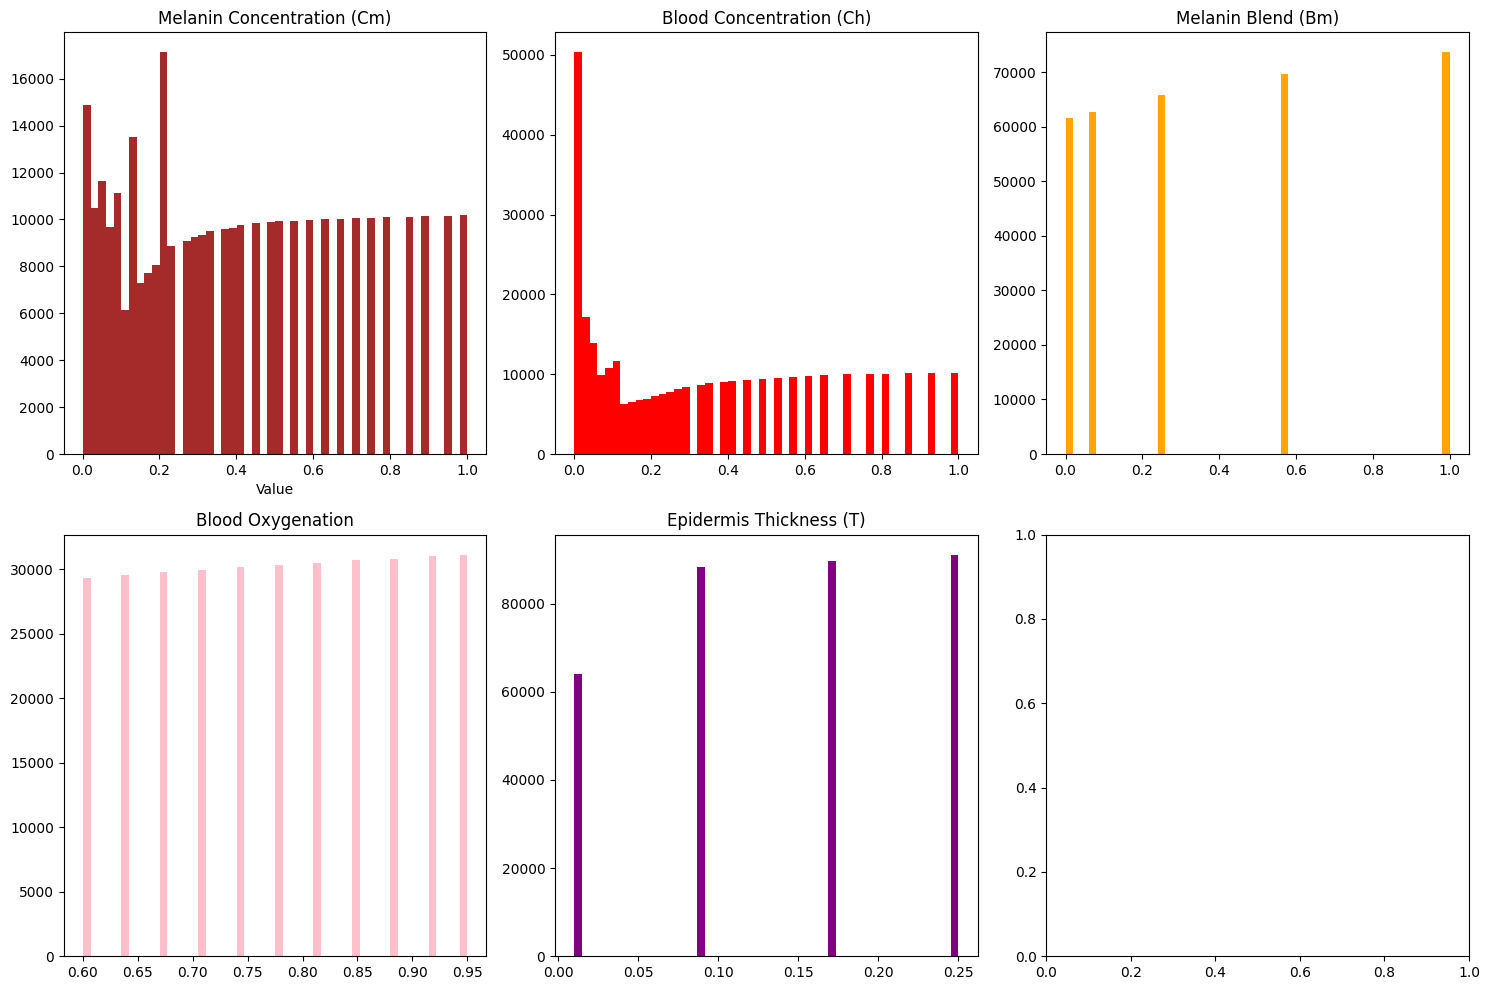

In [9]:
# Plot parameter distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].hist(df['melanin_concentration(Cm)'], bins=50, color='brown')
axes[0,0].set_title('Melanin Concentration (Cm)')
axes[0,0].set_xlabel('Value')

axes[0,1].hist(df['blood_concentration(Ch)'], bins=50, color='red')
axes[0,1].set_title('Blood Concentration (Ch)')

axes[0,2].hist(df['melanin_blend(Bm)'], bins=50, color='orange')
axes[0,2].set_title('Melanin Blend (Bm)')

axes[1,0].hist(df['BloodOxy'], bins=50, color='pink')
axes[1,0].set_title('Blood Oxygenation')

axes[1,1].hist(df['epidermis_thickness(T)'], bins=50, color='purple')
axes[1,1].set_title('Epidermis Thickness (T)')

plt.tight_layout()
plt.show()

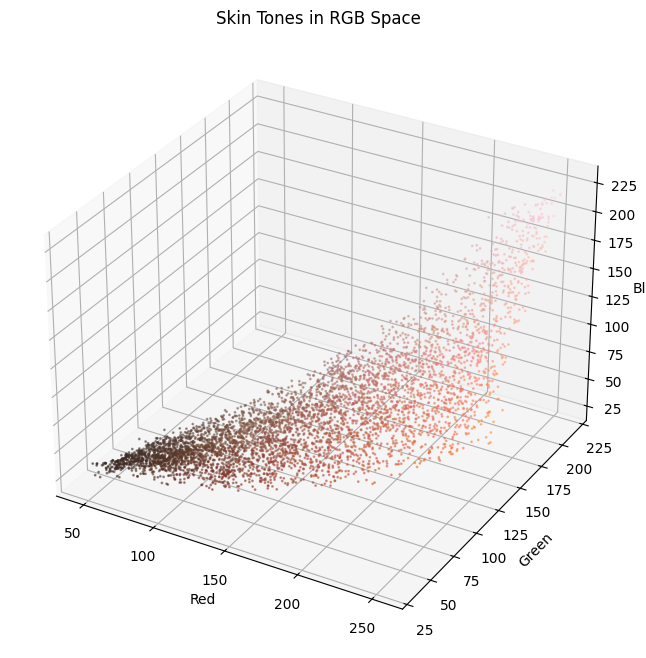

In [10]:
# Create 3D scatter plot of your skin tones in RGB space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Sample 5000 points for visibility (or use all if you want)
sample = df.sample(5000)

# Color each point by its actual RGB value
colors = sample[['sR', 'sG', 'sB']].values / 255.0

ax.scatter(sample['sR'], sample['sG'], sample['sB'], 
           c=colors, marker='o', s=1, alpha=0.5)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Skin Tones in RGB Space')
plt.show()

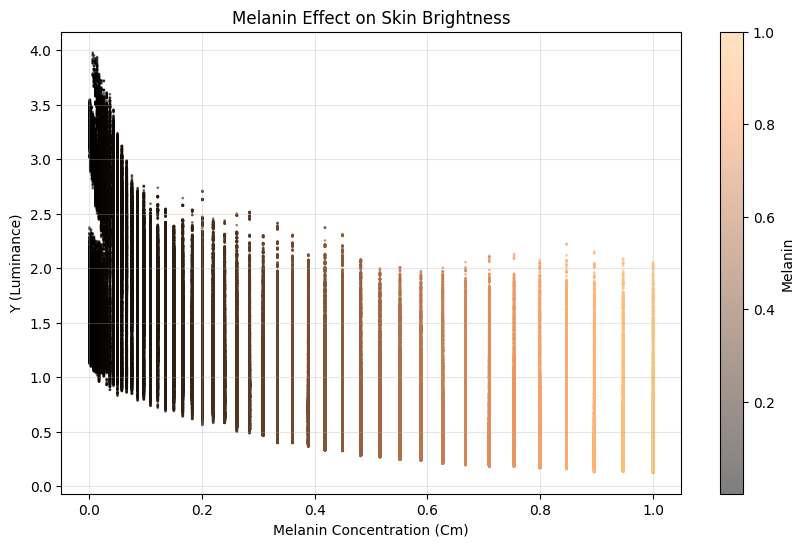

In [11]:
# How does melanin affect perceived brightness?
plt.figure(figsize=(10, 6))
plt.scatter(df['melanin_concentration(Cm)'], df['Y'], c=df['melanin_concentration(Cm)'], cmap='copper', s=1, alpha=0.5)
plt.xlabel('Melanin Concentration (Cm)')
plt.ylabel('Y (Luminance)')
plt.title('Melanin Effect on Skin Brightness')
plt.colorbar(label='Melanin')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Let's check the actual distribution
print("Cm distribution:")
print(f"  < 0.1: {(df['melanin_concentration(Cm)'] < 0.1).sum()} samples")
print(f"  0.1-0.5: {((df['Cm'] >= 0.1) & (df['Cm'] < 0.5)).sum()} samples")
print(f"  > 0.5: {(df['Cm'] > 0.5).sum()} samples")

In [ ]:
# Let's check the actual distribution
print("Ch distribution:")
print(f"  < 0.1: {(df['Ch'] < 0.1).sum()} samples")
print(f"  0.1-0.5: {((df['Ch'] >= 0.1) & (df['Ch'] < 0.5)).sum()} samples")
print(f"  > 0.5: {(df['Ch'] > 0.5).sum()} samples")

In [ ]:
# Let's check the actual distribution
print("Bm distribution:")
print(f"  < 0.1: {(df['Bm'] < 0.1).sum()} samples")
print(f"  0.1-0.5: {((df['Bm'] >= 0.1) & (df['Bm'] < 0.5)).sum()} samples")
print(f"  > 0.5: {(df['Bm'] > 0.5).sum()} samples")

In [ ]:
# Let's check the actual distribution
print("BloodOxy distribution:")
print(f"  < 0.1: {(df['BloodOxy'] < 0.1).sum()} samples")
print(f"  0.1-0.5: {((df['BloodOxy'] >= 0.1) & (df['BloodOxy'] < 0.5)).sum()} samples")
print(f"  > 0.5: {(df['BloodOxy'] > 0.5).sum()} samples")

In [ ]:
# Let's check the actual distribution
print("BloodOxy distribution:")
print(f"  < 0.1: {(df['BloodOxy'] < 0.1).sum()} samples")
print(f"  0.1-0.5: {((df['BloodOxy'] >= 0.1) & (df['BloodOxy'] < 0.5)).sum()} samples")
print(f"  > 0.5: {(df['BloodOxy'] > 0.5).sum()} samples")

In [ ]:
# Let's see what's really in those bins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Cm with more detail
axes[0,0].hist(df['Cm'], bins=100, color='brown', edgecolor='black', linewidth=0.5)
axes[0,0].set_title('Melanin (Cm) - High Resolution')
axes[0,0].set_xlabel('Cm value')
axes[0,0].set_ylabel('Count')
axes[0,0].grid(True, alpha=0.3)

# Ch with more detail  
axes[0,1].hist(df['Ch'], bins=100, color='red', edgecolor='black', linewidth=0.5)
axes[0,1].set_title('Blood (Ch) - High Resolution')
axes[0,1].set_xlabel('Ch value')
axes[0,1].grid(True, alpha=0.3)

# Cumulative distribution for Cm
axes[1,0].hist(df['Cm'], bins=100, cumulative=True, color='brown', alpha=0.7)
axes[1,0].set_title('Melanin - Cumulative Distribution')
axes[1,0].set_xlabel('Cm value')
axes[1,0].set_ylabel('Cumulative count')
axes[1,0].grid(True, alpha=0.3)

# Cumulative for Ch
axes[1,1].hist(df['Ch'], bins=100, cumulative=True, color='red', alpha=0.7)
axes[1,1].set_title('Blood - Cumulative Distribution')
axes[1,1].set_xlabel('Ch value')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Add L*a*b* conversion
def xyz_to_lab(X, Y, Z):
    # Reference white D65
    Xn, Yn, Zn = 95.047, 100.0, 108.883
    
    def f(t):
        return t**(1/3) if t > 0.008856 else (7.787 * t + 16/116)
    
    L = 116 * f(Y/Yn) - 16
    a = 500 * (f(X/Xn) - f(Y/Yn))
    b = 200 * (f(Y/Yn) - f(Z/Zn))
    
    return L, a, b

# Apply to your dataframe
df['L'], df['a'], df['b'] = zip(*df.apply(
    lambda row: xyz_to_lab(row['X'], row['Y'], row['Z']), axis=1
))

In [ ]:
df

In [ ]:
# Plot in L*a*b* space - most useful for skin analysis!
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# L* vs a* (Lightness vs Red-Green)
axes[0].scatter(df['a'], df['L'], c=df[['sR','sG','sB']].values/255, s=1)
axes[0].set_xlabel('a* (Green ← → Red)')
axes[0].set_ylabel('L* (Lightness)')
axes[0].set_title('Skin Tones: Lightness vs Redness')
axes[0].grid(True, alpha=0.3)

# a* vs b* (chromaticity diagram)
axes[1].scatter(df['a'], df['b'], c=df[['sR','sG','sB']].values/255, s=1)
axes[1].set_xlabel('a* (Green ← → Red)')
axes[1].set_ylabel('b* (Blue ← → Yellow)')
axes[1].set_title('Skin Tone Chromaticity')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Create a visualization showing blood's effect on redness
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Blood concentration vs a* (redness)
axes[0].scatter(df['Ch'], df['a'], c=df['Ch'], cmap='Reds', s=1, alpha=0.3)
axes[0].set_xlabel('Blood Concentration (Ch)')
axes[0].set_ylabel('a* (Redness)')
axes[0].set_title('Blood Effect on Skin Redness')

# Blood oxygenation effect
axes[1].scatter(df['BloodOxy'], df['a'], c=df['BloodOxy'], cmap='RdPu', s=1, alpha=0.3)
axes[1].set_xlabel('Blood Oxygenation')
axes[1].set_ylabel('a* (Redness)')
axes[1].set_title('Oxygenation Effect on Color')

plt.tight_layout()
plt.show()

In [ ]:
# Check very low blood samples
low_blood = df[df['Ch'] < 0.01]
print(f"Samples with Ch < 0.01: {len(low_blood)}")
print(f"Their average color:")
print(f"  L*: {low_blood['L'].mean():.1f}")
print(f"  a*: {low_blood['a'].mean():.1f}")  
print(f"  b*: {low_blood['b'].mean():.1f}")
print(f"  RGB: ({low_blood['sR'].mean():.0f}, {low_blood['sG'].mean():.0f}, {low_blood['sB'].mean():.0f})")

In [ ]:
# What's the melanin concentration in these low-blood samples?
low_blood = df[df['Ch'] < 0.01]

print("Low blood samples - Melanin distribution:")
print(f"  Average Cm: {low_blood['Cm'].mean():.3f}")
print(f"  Min Cm: {low_blood['Cm'].min():.3f}")
print(f"  Max Cm: {low_blood['Cm'].max():.3f}")

print("\nBreakdown by melanin level:")
print(f"  Cm < 0.1: {(low_blood['Cm'] < 0.1).sum()} samples")
print(f"  0.1 < Cm < 0.5: {((low_blood['Cm'] >= 0.1) & (low_blood['Cm'] < 0.5)).sum()} samples")
print(f"  Cm > 0.5: {(low_blood['Cm'] > 0.5).sum()} samples")

# Also check a few examples
print("\nSample rows with Ch < 0.01 and varying melanin:")
print(low_blood[['Cm', 'Ch', 'L', 'a', 'b', 'sR', 'sG', 'sB']].head(20))

In [ ]:
# Plot the low-blood samples colored by melanin
import matplotlib.pyplot as plt

low_blood = df[df['Ch'] < 0.01]

plt.figure(figsize=(12, 5))

# Left: RGB color of low-blood samples
plt.subplot(1, 2, 1)
plt.scatter(low_blood['Cm'], low_blood['L'], 
           c=low_blood[['sR','sG','sB']].values/255, s=5, alpha=0.5)
plt.xlabel('Melanin Concentration (Cm)')
plt.ylabel('L* (Lightness)')
plt.title('Low Blood Samples (Ch < 0.01)\nColored by their actual RGB')
plt.grid(True, alpha=0.3)

# Right: Show how blood affects redness at different melanin levels
plt.subplot(1, 2, 2)
low_mel = df[df['Cm'] < 0.1]
high_mel = df[df['Cm'] > 0.5]

plt.scatter(low_mel['Ch'], low_mel['a'], c='lightcoral', s=1, alpha=0.3, label='Low melanin (Cm<0.1)')
plt.scatter(high_mel['Ch'], high_mel['a'], c='saddlebrown', s=1, alpha=0.3, label='High melanin (Cm>0.5)')
plt.xlabel('Blood Concentration (Ch)')
plt.ylabel('a* (Redness)')
plt.title('Blood Effect Depends on Melanin Level')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()